Basemap plots - plotting maps and geographic datasets
---

**Overview of the notebook:**
    - A simple Basemap plot
    - Plotting points,lines polygones from shapefiles
    - Plotting points at position (lat/lon)
    - Importing of a list of TIF files from a folder
    - Align all raster datasets
    - Display each raster file next to it's histogram
    - Raster to Design-Matrix


In [5]:
import numpy as np                   # numeric python
import matplotlib.pyplot as plt      # plot library
import matplotlib.mlab as mlab       
 
import scipy as sp                   # scientific python
#import scipy.stats as sts
from scipy import stats              # statistical distributions

import pandas as pd                  # dataframes, data containers
import skimage.io as skio            # images
import glob
%matplotlib inline

A simple Basemap plot
===

In [11]:
#http://matplotlib.org/basemap/api/basemap_api.html
%matplotlib inline
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
#from netCDF4 import Dataset

# read in etopo5 topography/bathymetry.
#url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
#etopodata = Dataset(url)

#topoin = etopodata.variables['ROSE'][:]
#lons = etopodata.variables['ETOPO05_X'][:]
#lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
#topoin,lons = shiftgrid(180.,topoin,lons,start=False)

# plot topography/bathymetry as an image.

# create the figure and axes instances.
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
#topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
#im = m.imshow(topodat,cm.GMT_haxby)
# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])
# add colorbar
#cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')

plt.show()

ImportError: No module named 'mpl_toolkits.basemap'

Plotting points,lines polygones from shapefiles
===

In [12]:

#http://basemaptutorial.readthedocs.org/en/latest/shapefile.html
#http://download.geofabrik.de/europe/germany/berlin.html
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=11.5,llcrnrlat=52.,urcrnrlon=14.,urcrnrlat=55.,
             resolution='i', projection='tmerc', lat_0 = 52, lon_0 = 12.5)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()

# hier dann das shapefile angeben Pfad von der Platte
map.readshapefile('berlin-latest/railways', 'points')

plt.show()

ImportError: No module named 'mpl_toolkits.basemap'

Plotting points at position (lat/lon)
===

In [ ]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=45)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

x, y = map(0, 0) # Koordinaten in der jeweiligen Projektion berechnen!!! (Eingaben in Lon/Lat )

map.plot(x, y, marker='D',color='m')

plt.show()

**and label them...**

In [13]:
#http://de.mathworks.com/help/map/examples/georeferencing-an-image-to-an-orthotile-base-layer.html?requestedDomain=www.mathworks.com
# vielleicht geht auch das ja

#http://introtopython.org/visualization_earthquakes.html

#http://basemaptutorial.readthedocs.org/en/latest/plotting_data.html

%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Make this plot larger.
plt.figure(figsize=(16,12))   # Stellt die Größe des Plots ein

map = Basemap(llcrnrlon=10,llcrnrlat=50.,urcrnrlon=15.,urcrnrlat=55.,
             resolution='i', projection='tmerc', lat_0 = 52, lon_0 = 12.5)

#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

#map.bluemarble()   # Rasterdaten im Hintergrund anzeigen, weltweit Bluemarble Mosaik
map.shadedrelief()
map.drawcoastlines()
map.drawcountries()
parallels = np.arange(50.,60,1.)
map.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(0.,20.,2.)
map.drawmeridians(meridians,labels=[1,0,0,1])

# Einen Punkt zeichnen
lon = 13.3318
lat = 52.0799
x,y = map(lon, lat)  #damit werden die Längen und Breitengrade in Kartenkoordinaten umgerechnet 
map.plot(x, y, 'bo', markersize=6)

# mehrere Punkte zeichnen
lons = [13.53318, 11.8331, 13.46572]
lats = [51.0799, 52.894, 53.2399]
xs,ys = map(lons, lats)
map.plot(xs, ys, 'ro', markersize=4)

# Punkte mit Beschriftungen versehen
labels = ['Sitka', 'Baranof', 'Port Alexander']
for label, xpt, ypt in zip(labels, xs, ys):
    plt.text(xpt, ypt, label)
    #plt.text(xpt+10000, ypt+5000, label)   # um Labels etwas vom punkt entfernt zu plotten

# eine Linie zeichnen im Plot
lons1 = [11.1, 12.83, 13.1, 13.3]
lats1 = [51.9, 52.44, 53.2, 51.3]
xs1,ys1 = map(lons1, lats1)
map.plot(xs1, ys1, marker=None,color='m')


# ein geschlossenen Linienzug (Polygon) zeichnen im Plot
lons1 = [11.1, 11.3, 11.2, 11.1]
lats1 = [51.5, 51.3, 51.8, 51.5]
xs1,ys1 = map(lons1, lats1)
map.plot(xs1, ys1, marker=None,color='r')

plt.show()

ImportError: No module named 'mpl_toolkits.basemap'

Importing of a list of TIF files from a folder
===

** and check if 'NaN' Values of 'infinity' are present in the raster, if yes replace them by zero...  **

such a previous check of data consistencey is basic for later calculation on the raster-files. If 'NaN' or 'Infty' pixel-values are within the data most numpy functions might fail and cause script crashes.

In [2]:
import glob
Folder='data/AOI3_V7_Train/'
#Folder='../../_Data_ori_Tif/AOI2_small_6_Test/'
# https://docs.python.org/2/library/glob.html 
# http://stackoverflow.com/questions/3207219/how-to-list-all-files-of-a-directory-in-python
TIFs=glob.glob(Folder+"*.tif")
TFWs=glob.glob(Folder+"*.tfw")
print(TIFs)

['data/AOI3_V7_Train/TIF_B4.tif', 'data/AOI3_V7_Train/TIF_AFG_GDEM_V21.tif', 'data/AOI3_V7_Train/TIF_B5.tif', 'data/AOI3_V7_Train/TIF_B7.tif', 'data/AOI3_V7_Train/TIF_B6.tif', 'data/AOI3_V7_Train/TIF_ASPW.tif', 'data/AOI3_V7_Train/TIF_ASPS.tif', 'data/AOI3_V7_Train/TIF_B2.tif', 'data/AOI3_V7_Train/TIF_B3.tif', 'data/AOI3_V7_Train/TIF_DistStreams.tif', 'data/AOI3_V7_Train/TIF_ASPE.tif', 'data/AOI3_V7_Train/TIF_EucDist_roads.tif', 'data/AOI3_V7_Train/TIF_B1.tif', 'data/AOI3_V7_Train/TIF_lith_type.tif', 'data/AOI3_V7_Train/TIF_lc93_32.tif', 'data/AOI3_V7_Train/TIF_Curvature.tif', 'data/AOI3_V7_Train/TIF_Slope.tif', 'data/AOI3_V7_Train/TIF_TrueLabels.tif', 'data/AOI3_V7_Train/TIF_B10.tif', 'data/AOI3_V7_Train/TIF_B11.tif', 'data/AOI3_V7_Train/TIF_EucDist_badakhshan.tif', 'data/AOI3_V7_Train/TIF_precip.tif', 'data/AOI3_V7_Train/TIF_NDVI.tif', 'data/AOI3_V7_Train/TIF_EucDist_faults.tif', 'data/AOI3_V7_Train/TIF_ASPN.tif', 'data/AOI3_V7_Train/TIF_B8.tif', 'data/AOI3_V7_Train/TIF_B9.tif']


Now a list of the file names inside the above folder is saved in the variable **"TIFs"**.
I can now iterate over the files and check each of them for data consistency. 

In [7]:
i=0
LayerTrain=dict()

for filr in TIFs:
    
    if '_AF' in filr or '_B' in filr or '_C' in filr or '_Di' in filr or '_E' in filr or '_p' in filr or '_S' in filr or '_N' in filr:
        #print i, filr.split("/")[4][0:4]+'r_'+filr.split("/")[4][4:-4]
        name=filr.split("/")[2][0:4]+'r_'+filr.split("/")[2][4:-4]
        print( i,name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
        if 'DistStreams' in filr or 'faults' in filr or 'roads' in filr or 'badakh' in filr:
            LayerTrain[name]=np.log(LayerTrain[name])
            
            print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            print( 'Anzahl infty : {}'.format(np.sum(np.isinf(LayerTrain[name])*1)))
            LayerTrain[name][np.isinf(LayerTrain[name])]=0
            print( 'Wert infty durch 0 ersetzt / Anzahl infty jetzt: {}'.format(np.sum(np.isinf(LayerTrain[name])*1)))
                
    elif '_AS' in filr or '_l' in filr :
        #print i, filr.split("/")[4][0:4]+'n_'+filr.split("/")[4][4:-4]
        name=filr.split("/")[2][0:4]+'n_'+filr.split("/")[2][4:-4]
        print( i,name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
        if 'lc93' in filr:
            LayerTrain['TIF_n_LanduseRAL'] =((LayerTrain.get(name) == 1) | (LayerTrain.get(name) ==5))*1.0
            print( 'TIF_n_LanduseRAL ', LayerTrain['TIF_n_LanduseRAL'].shape)  #Rainfed Agricultural Land....ok
            LayerTrain['TIF_n_LanduseRL']  =( LayerTrain.get(name) == 2)*1.0
            print( 'TIF_n_LanduseRL ', LayerTrain['TIF_n_LanduseRL'].shape)    #Range Land....ok
            LayerTrain['TIF_n_LanduseIRA'] =((LayerTrain.get(name) == 4) | (LayerTrain.get(name) ==9) |(LayerTrain.get(name) ==10))*1.0
            print( 'TIF_n_LanduseIRA ', LayerTrain['TIF_n_LanduseIRA'].shape ) #Irrigated Agricultural Land....ok
            
            # ----------------------------------------------- 
            #plt.imshow(TIF_lc93_32 ==3)                                            #Sandcover, !!!!!nicht vorhanden
            #plt.imshow(TIF_lc93_32 ==6)  ==8) ==14)                               # % Waterbody and Marshland !!!! nicht vorhanden
            # TIF_lc93_32==7)  % Fruit Trees.......... Fruchtbäume)  !!!nicht vorhanden
            #plt.imshow(TIF_lc93_32 ==11,12,13)  % Vineyards  .......... Weinberge) % Forest and Shrubs ... !!!nicht vorhanden
            #plt.show()
            
            del LayerTrain[name] 
        if 'lith' in filr:
            LayerTrain['TIF_n_VOLC'] =(LayerTrain.get(name) == 1)*1.0  # % Volcanic ...... Vulkanisches Gestein
            print( 'TIF_n_VOLC ', LayerTrain['TIF_n_VOLC'].shape)
            LayerTrain['TIF_n_SEDI'] =(LayerTrain.get(name) == 2)*1.0  # % Sedimentary ... Sedimente
            print( 'TIF_n_SEDI ', LayerTrain['TIF_n_SEDI'].shape)
            LayerTrain['TIF_n_PLUT'] =(LayerTrain.get(name) == 3)*1.0  # % Plutonic....... Plutonisches Gestein
            print( 'TIF_n_SEDI ', LayerTrain['TIF_n_SEDI'].shape)
            
            #TIF_META= (TIF_lith_type == 4) # % Metamorphic.... Metamorphes Gestein .... nicht vorhanden!!!! 
            del LayerTrain[name]                   
            

    elif '_Tr' in filr:
        #print i, filr.split("/")[4][0:-4]
        name =filr.split("/")[2][0:-4]
        print( i, name)
        LayerTrain[name]=np.float32(skio.imread(filr))
        LayerTrain[name]=(LayerTrain.get(name) > 0)*1.0             # TrueLabels auf Intervall [0,1] bringen
        print( LayerTrain[name].shape)
        print( 'Anzahl NaN : {}'.format(np.sum(np.isnan(LayerTrain[name])*1)))
            
    i+=1

0 TIF_r_B4
(607, 948)
Anzahl NaN : 0
1 TIF_r_AFG_GDEM_V21
(608, 948)
Anzahl NaN : 0
2 TIF_r_B5
(607, 948)
Anzahl NaN : 0
3 TIF_r_B7
(607, 948)
Anzahl NaN : 0
4 TIF_r_B6
(607, 948)
Anzahl NaN : 0
5 TIF_n_ASPW
(608, 948)
Anzahl NaN : 0
6 TIF_n_ASPS
(608, 948)
Anzahl NaN : 0
7 TIF_r_B2
(607, 948)
Anzahl NaN : 0
8 TIF_r_B3
(607, 948)
Anzahl NaN : 0
9 TIF_r_DistStreams
(608, 948)
Anzahl NaN : 0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Anzahl NaN : 0
Anzahl infty : 39458
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
10 TIF_n_ASPE
(608, 948)
Anzahl NaN : 0
11 TIF_r_EucDist_roads
(608, 947)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 12088
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
12 TIF_r_B1
(607, 948)
Anzahl NaN : 0
13 TIF_n_lith_type
(608, 948)
Anzahl NaN : 0
TIF_n_VOLC  (608, 948)
TIF_n_SEDI  (608, 948)
TIF_n_SEDI  (608, 948)
14 TIF_n_lc93_32
(608, 948)
Anzahl NaN : 0
TIF_n_LanduseRAL  (608, 948)
TIF_n_LanduseRL  (608, 948)
TIF_n_LanduseIRA  (608, 948)
15 TIF_r_Curvature
(608, 948)
Anzahl NaN : 0
16 TIF_r_Slope
(608, 948)
Anzahl NaN : 0
17 TIF_TrueLabels
(562, 905)
Anzahl NaN : 0
18 TIF_r_B10
(607, 948)
Anzahl NaN : 0
19 TIF_r_B11
(607, 948)
Anzahl NaN : 0
20 TIF_r_EucDist_badakhshan
(608, 948)
Anzahl NaN : 0
Anzahl NaN : 0
Anzahl infty : 2261
Wert infty durch 0 ersetzt / Anzahl infty jetzt: 0
21 TIF_r_precip
(608, 948)
Anzahl NaN : 0
22 TIF_r_NDVI
(608, 947)
Anzahl NaN : 0
23 TIF_r_EucDist_faults
(6

The imported TIF raster files can represent layers in a 3D data structure where each layer 
has another above and below itself. Except for the first and the last layer.

Align all raster datasets
===

for further calculations based on these raster datasets each layer has to have 
the same size and each pixel has to be aligned to the ones above or below them.

In [9]:
# Ausschneiden und auf die gleiche Größe bringen
a,b =LayerTrain['TIF_TrueLabels'].shape 
print( a,b)

for layer in sorted(LayerTrain.keys()  ) :
    if  'TIF_r' in layer or 'TIF_n' in layer:
        print( layer)
        LayerTrain[layer]=LayerTrain.get(layer)[0:a,1:b]
        print( LayerTrain.get(layer).shape)
    #else :
    #    print '---'
    #    print layer    
    #    LayerTrain[layer]=LayerTrain.get(layer)[:,1:]
    #    print LayerTrain.get(layer).shape


#print sorted(LayerTrain.keys()  )
print( 'TIF_TrueLabels shape'  ,LayerTrain['TIF_TrueLabels'].shape   )
print( 'beheben')
LayerTrain['TIF_TrueLabels']=LayerTrain.get('TIF_TrueLabels')[:,1:]
print('TIF_TrueLabels shape' , LayerTrain.get('TIF_TrueLabels').shape)

562 905
TIF_n_ASPE
(562, 904)
TIF_n_ASPN
(562, 904)
TIF_n_ASPS
(562, 904)
TIF_n_ASPW
(562, 904)
TIF_n_LanduseIRA
(562, 904)
TIF_n_LanduseRAL
(562, 904)
TIF_n_LanduseRL
(562, 904)
TIF_n_PLUT
(562, 904)
TIF_n_SEDI
(562, 904)
TIF_n_VOLC
(562, 904)
TIF_r_AFG_GDEM_V21
(562, 904)
TIF_r_B1
(562, 904)
TIF_r_B10
(562, 904)
TIF_r_B11
(562, 904)
TIF_r_B2
(562, 904)
TIF_r_B3
(562, 904)
TIF_r_B4
(562, 904)
TIF_r_B5
(562, 904)
TIF_r_B6
(562, 904)
TIF_r_B7
(562, 904)
TIF_r_B8
(562, 904)
TIF_r_B9
(562, 904)
TIF_r_Curvature
(562, 904)
TIF_r_DistStreams
(562, 904)
TIF_r_EucDist_badakhshan
(562, 904)
TIF_r_EucDist_faults
(562, 904)
TIF_r_EucDist_roads
(562, 904)
TIF_r_NDVI
(562, 904)
TIF_r_Slope
(562, 904)
TIF_r_precip
(562, 904)
TIF_TrueLabels shape (562, 905)
beheben
TIF_TrueLabels shape (562, 904)


Display each raster file next to it's histogram
===

TIF_TrueLabels


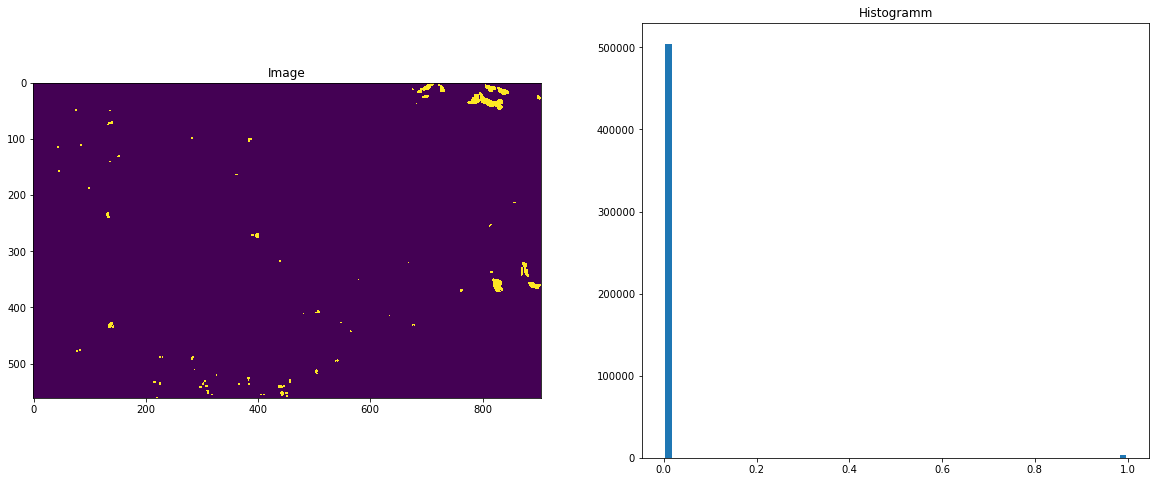

TIF_n_ASPE


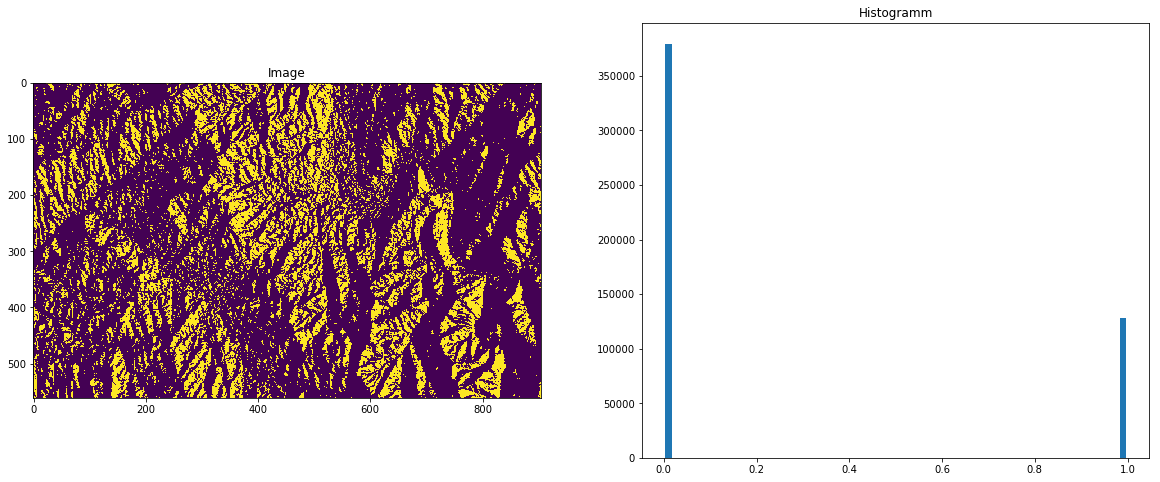

TIF_n_ASPN


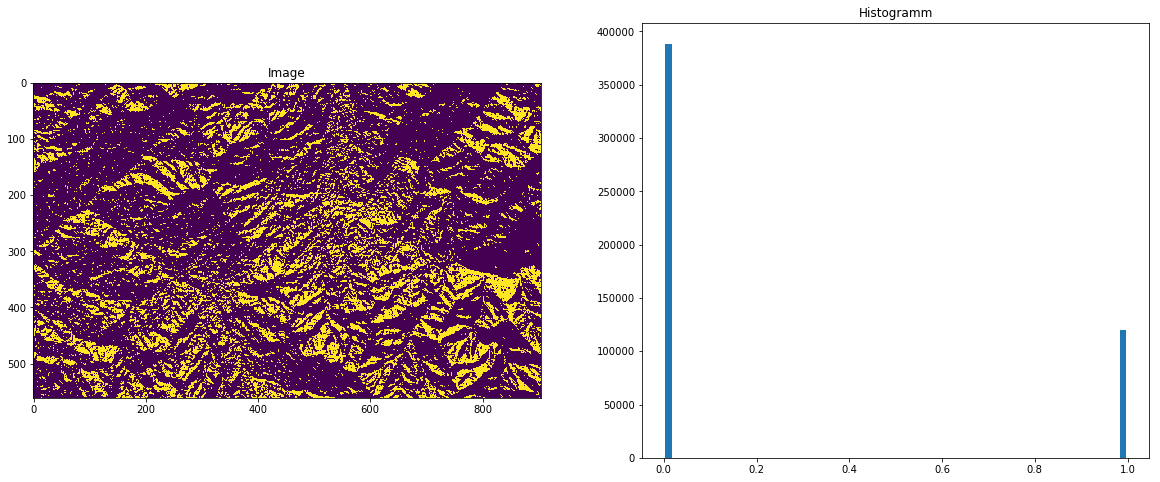

TIF_n_ASPS


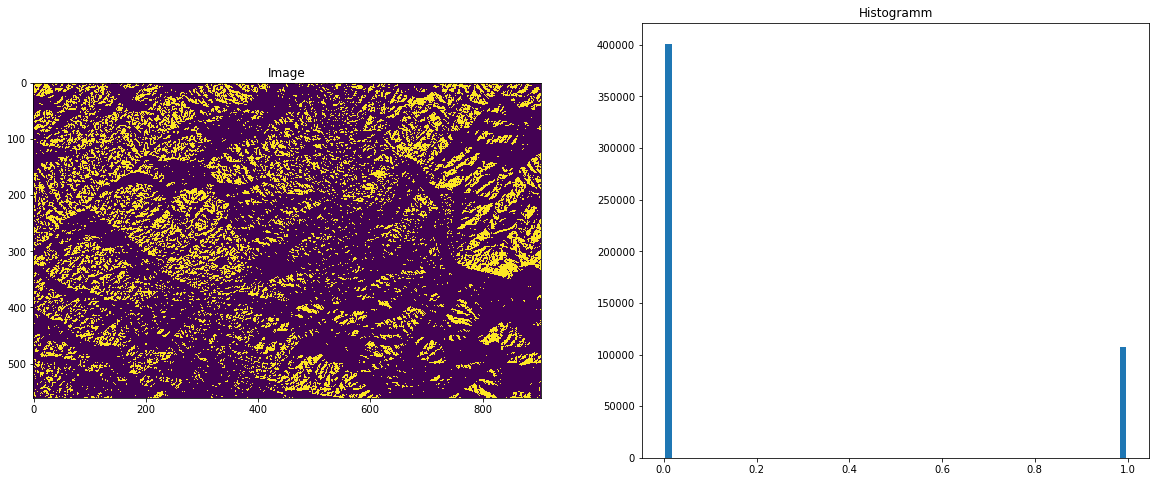

TIF_n_ASPW


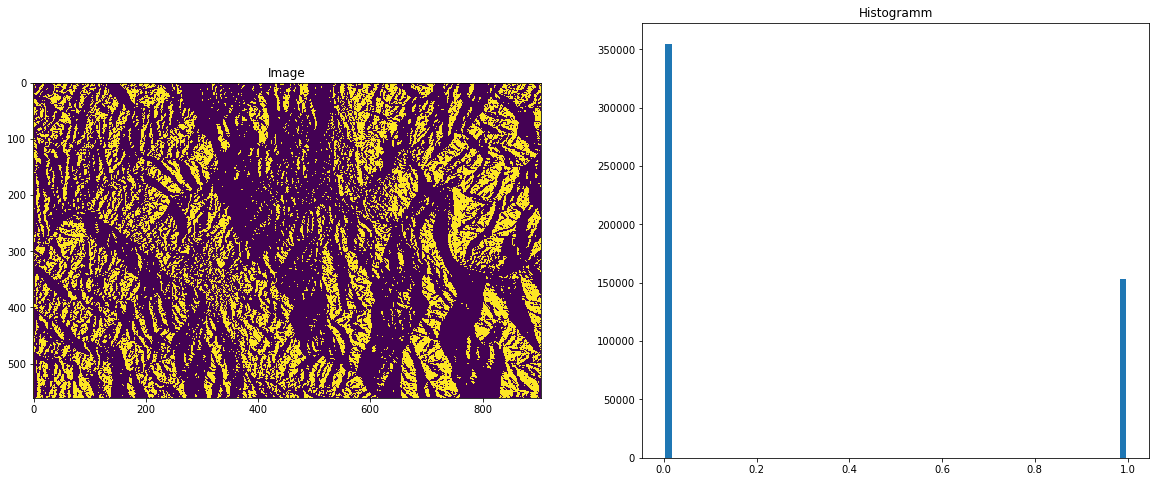

TIF_n_LanduseIRA


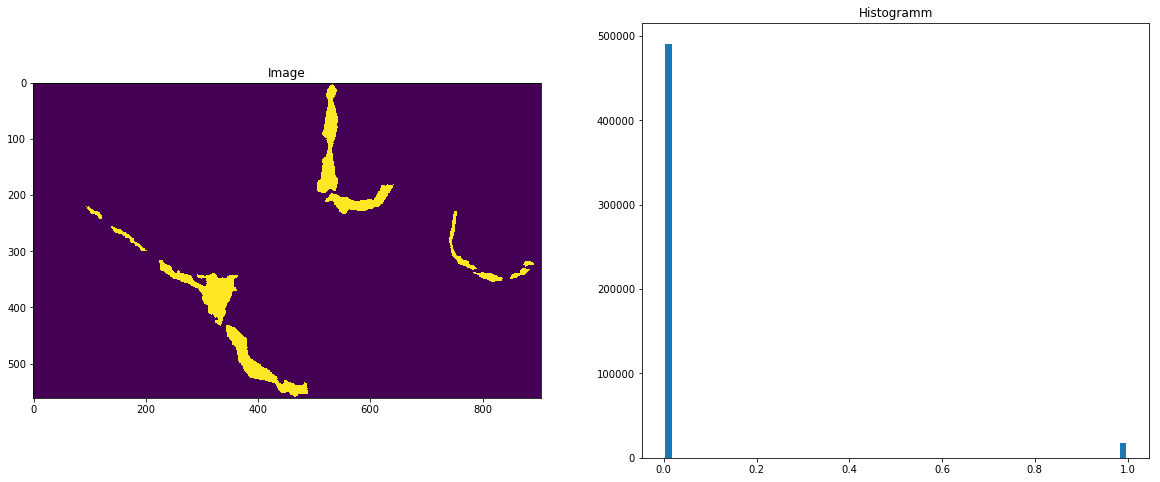

TIF_n_LanduseRAL


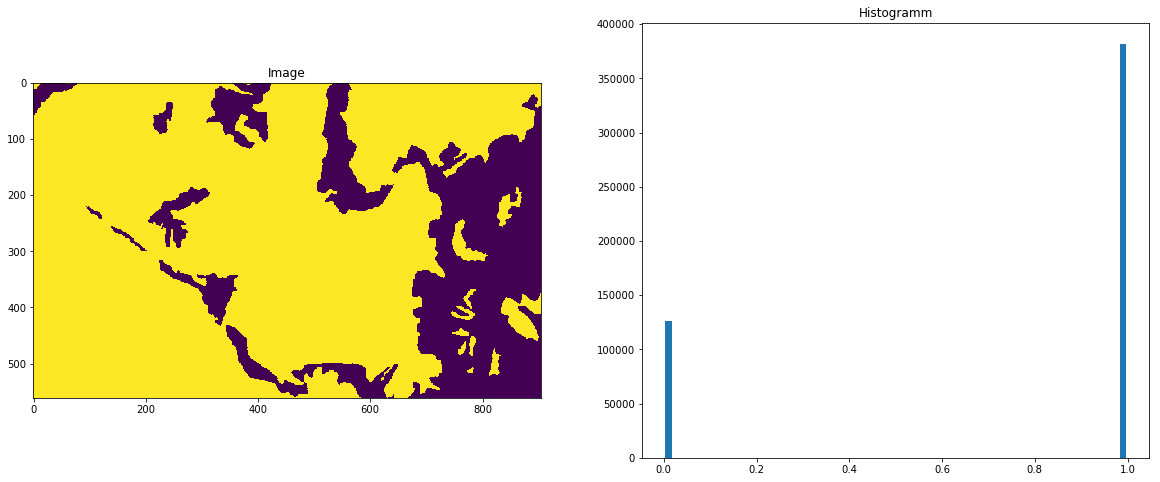

TIF_n_LanduseRL


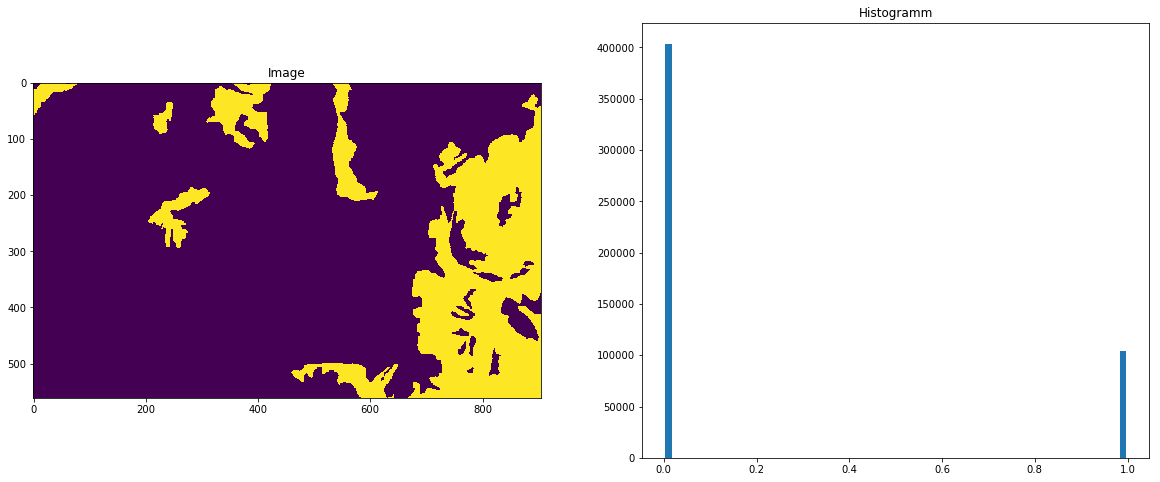

TIF_n_PLUT


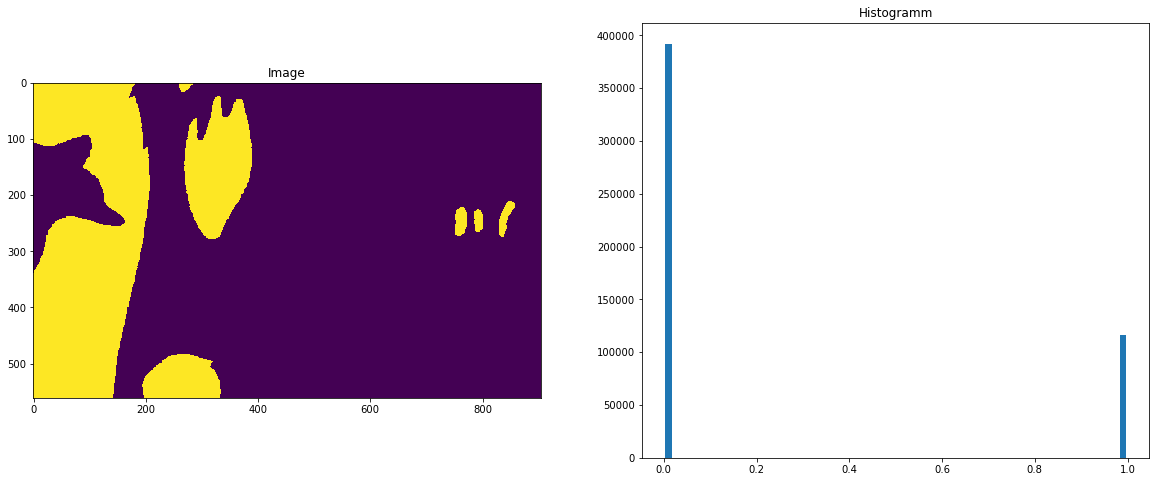

TIF_n_SEDI


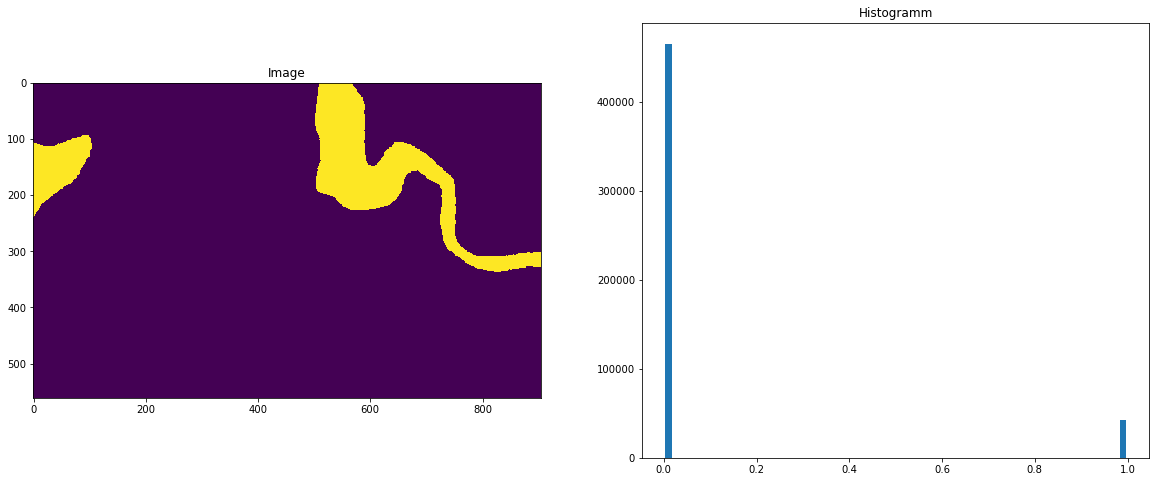

TIF_n_VOLC


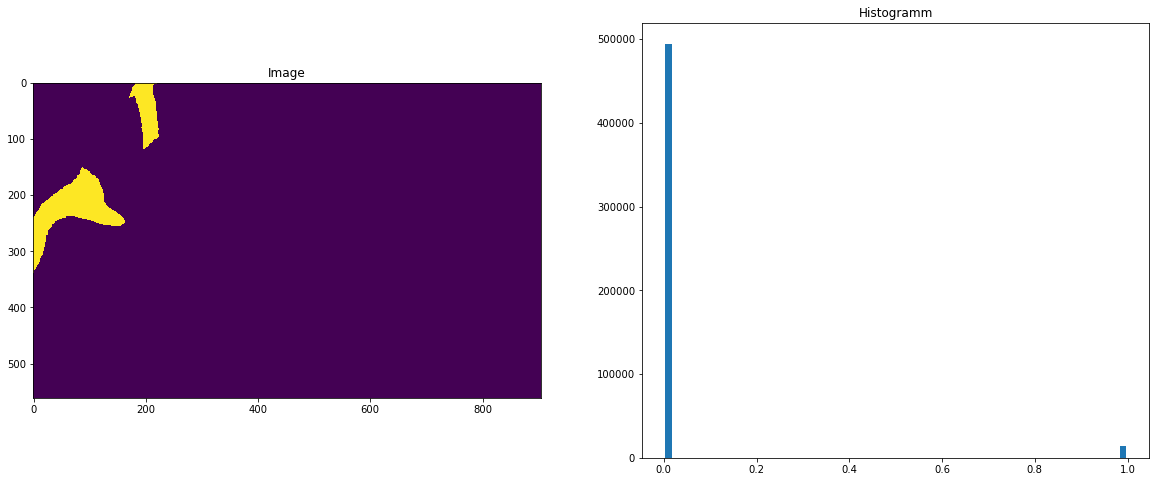

TIF_r_AFG_GDEM_V21


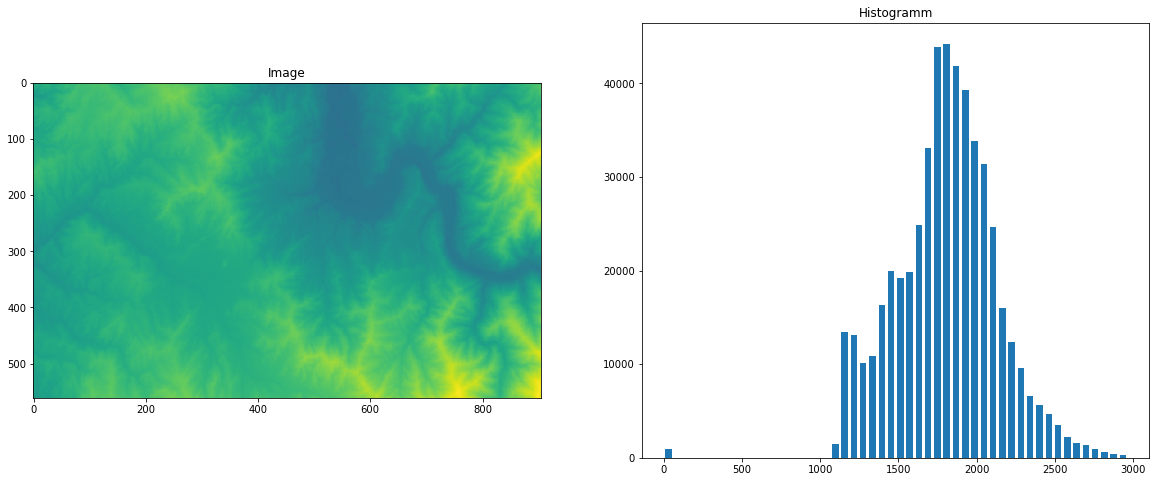

TIF_r_B1


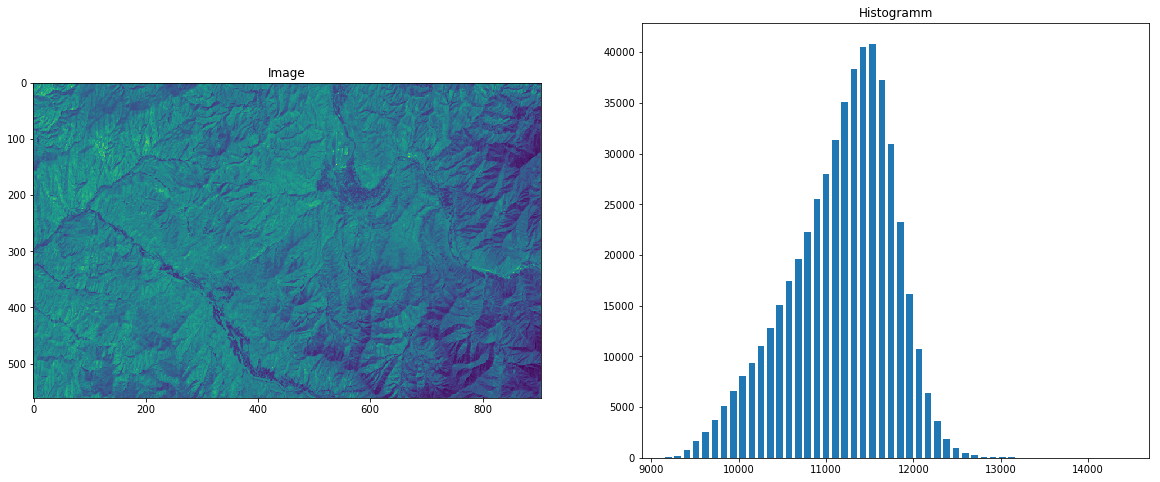

TIF_r_B10


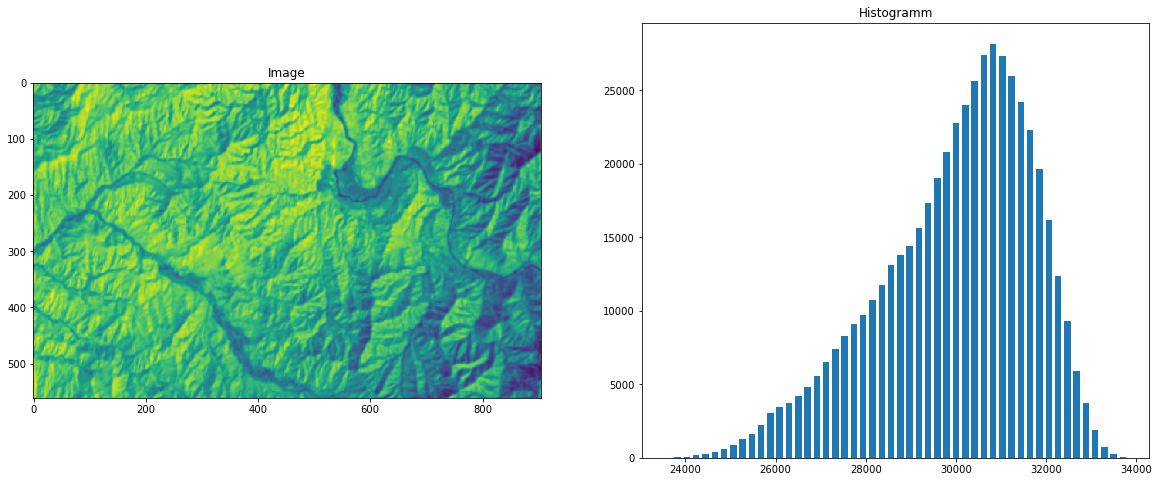

TIF_r_B11


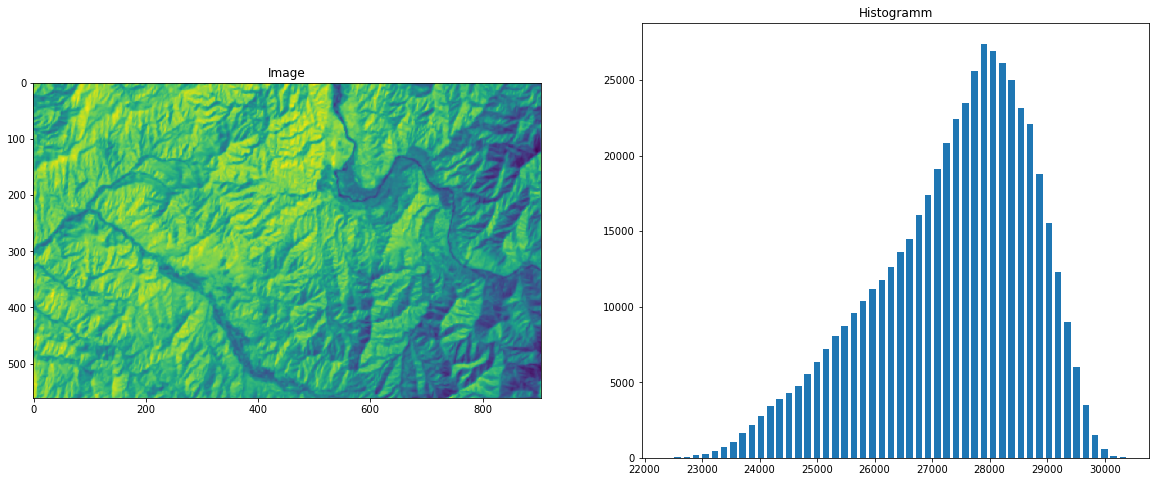

TIF_r_B2


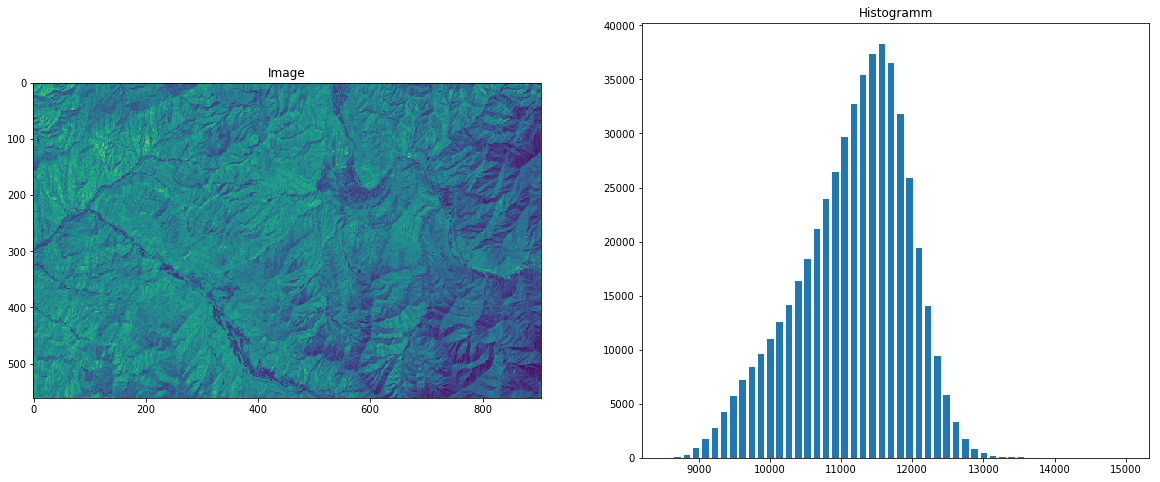

TIF_r_B3


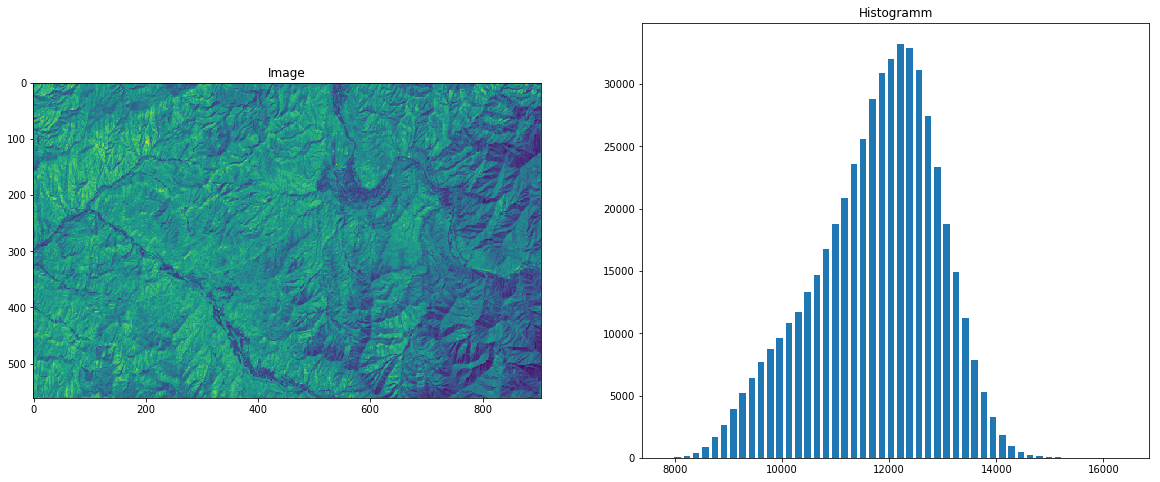

TIF_r_B4


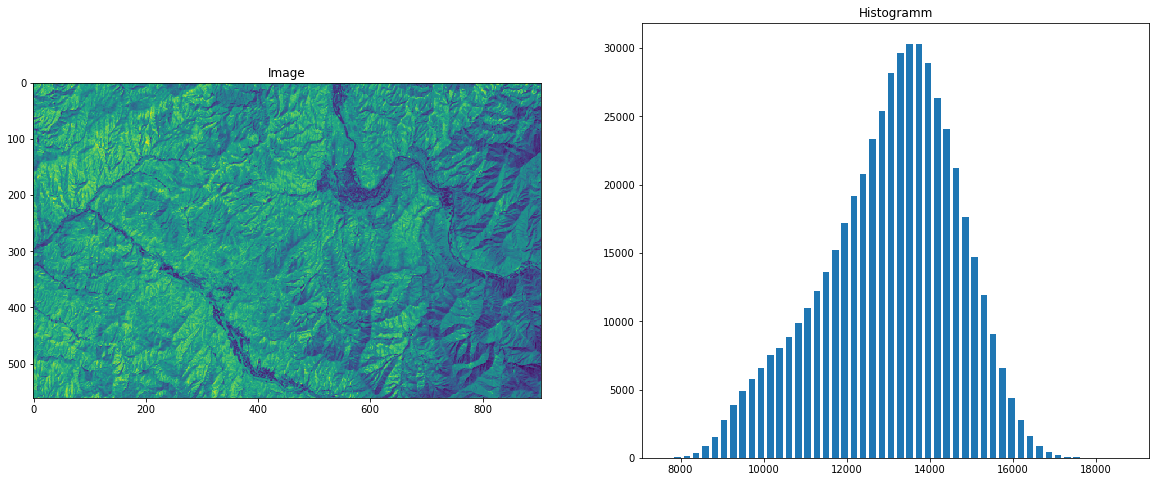

TIF_r_B5


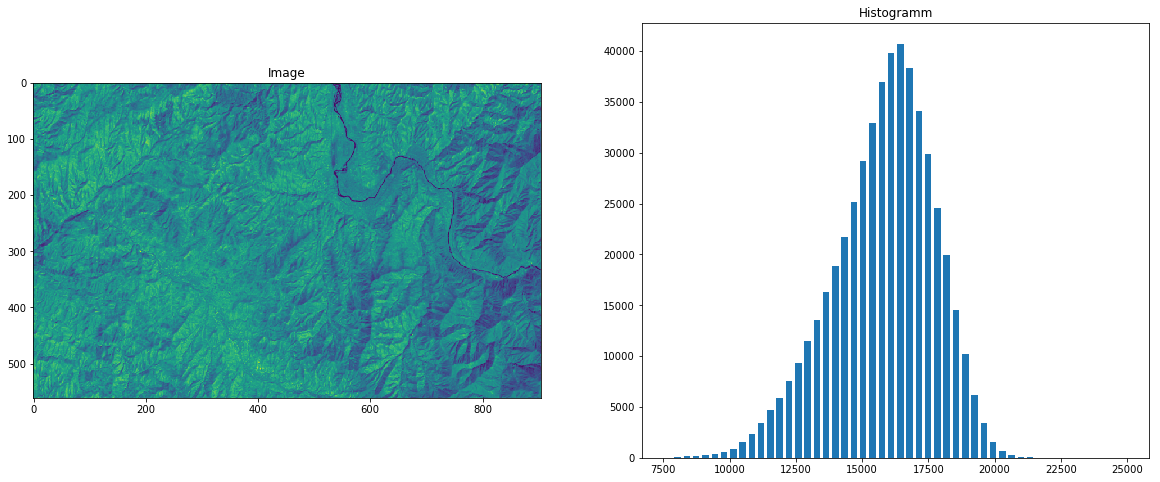

TIF_r_B6


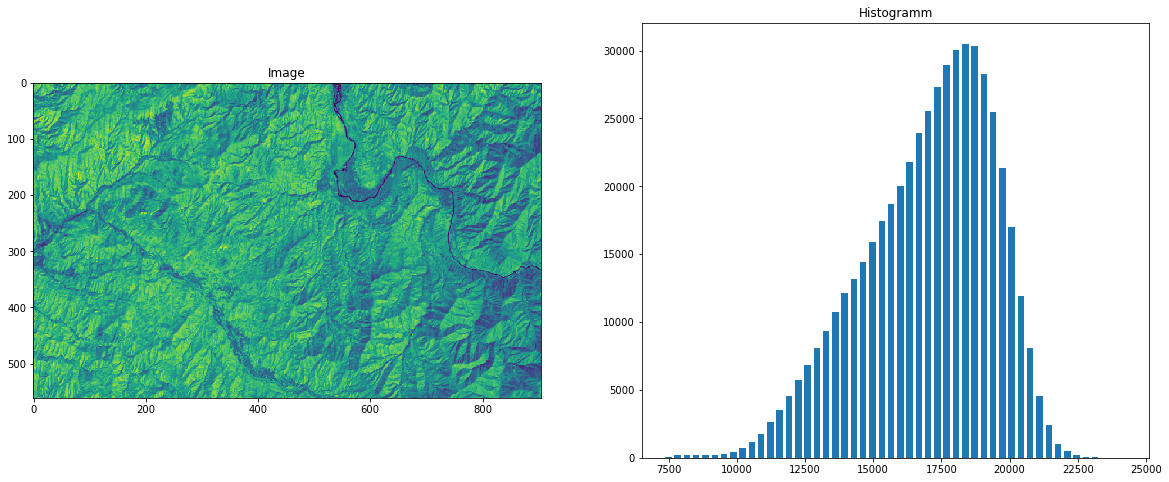

TIF_r_B7


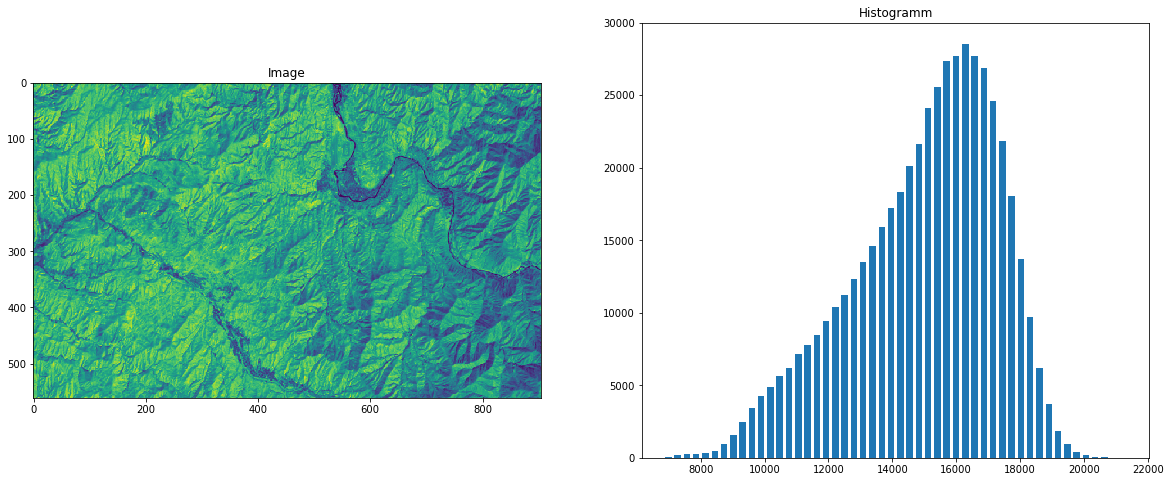

TIF_r_B8


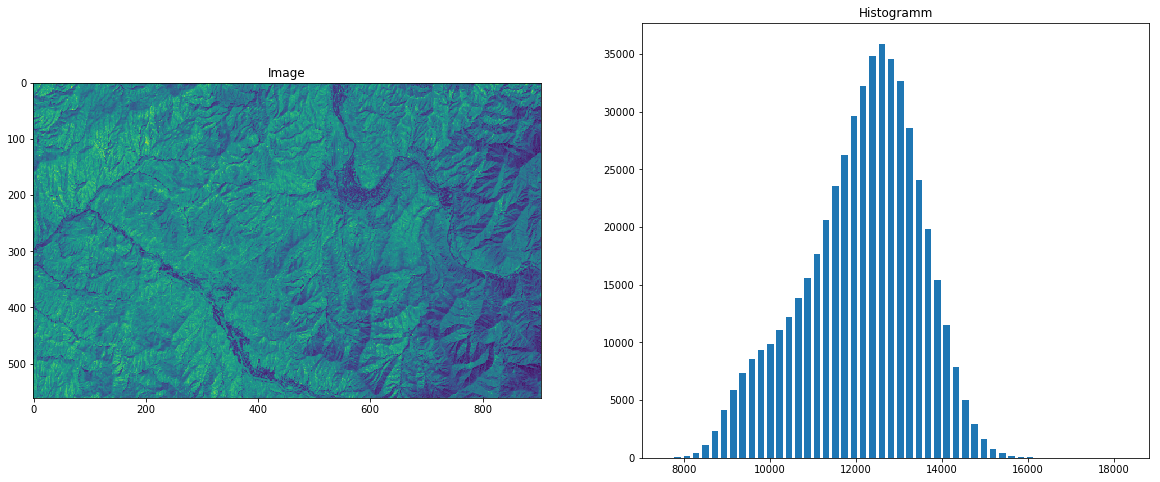

TIF_r_B9


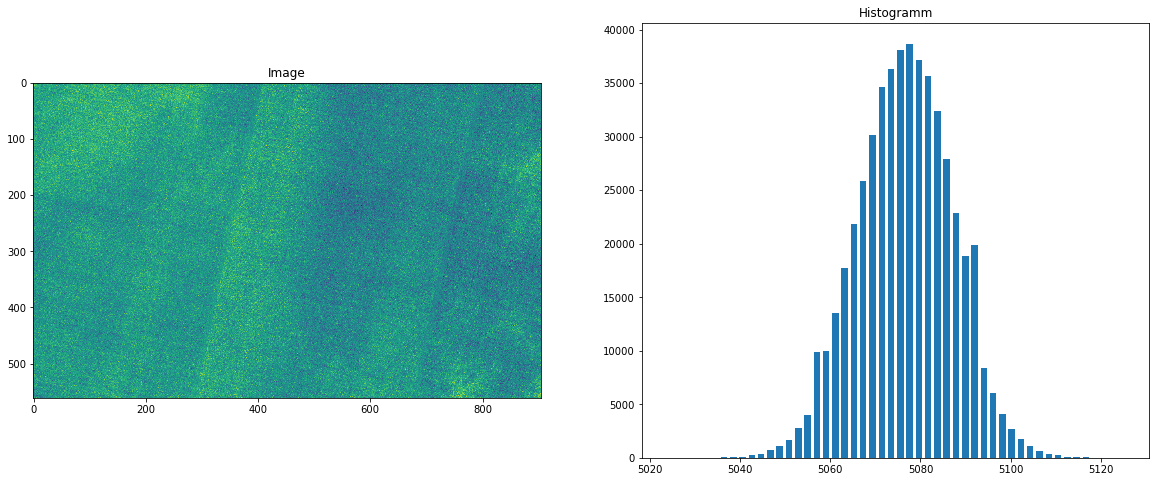

TIF_r_Curvature


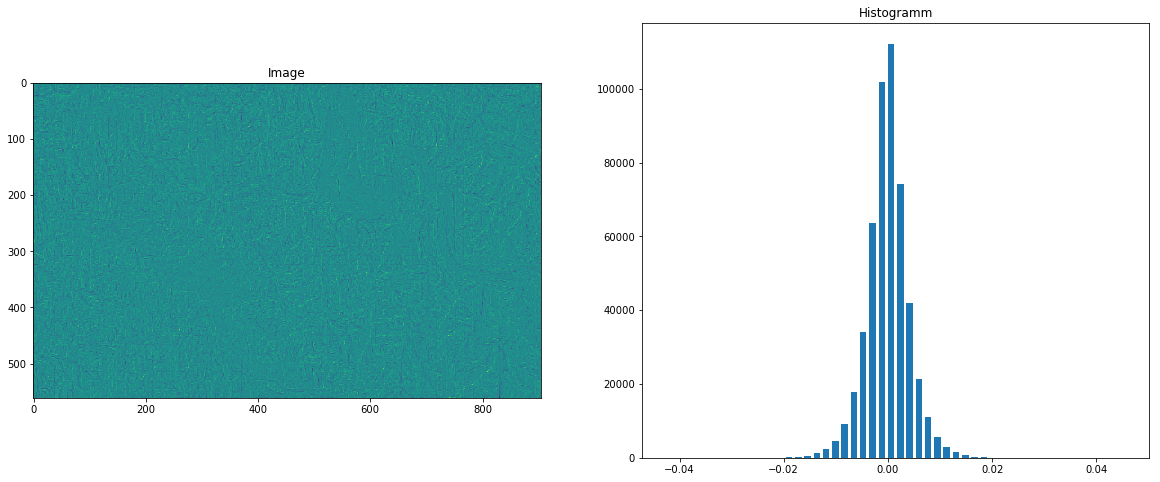

TIF_r_DistStreams


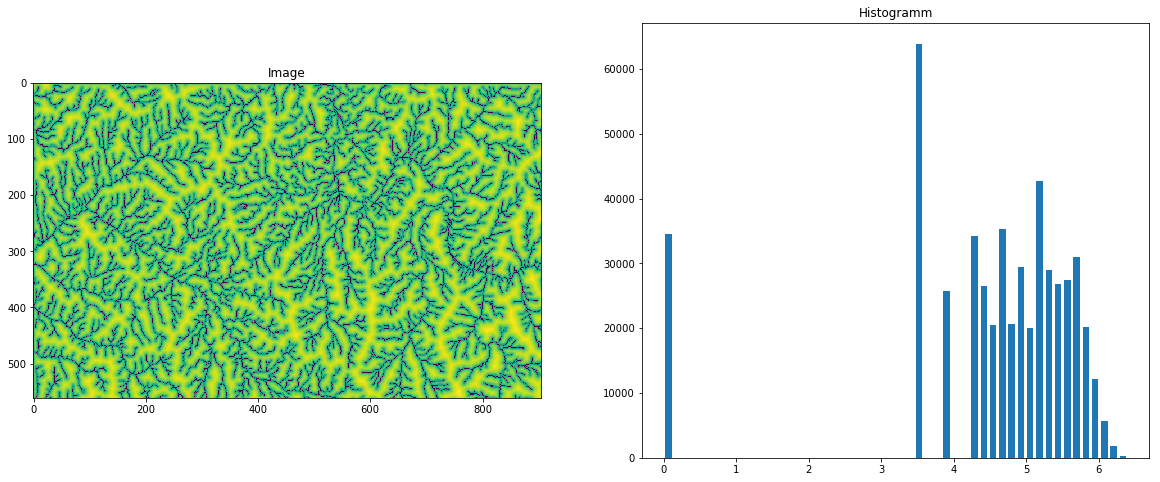

TIF_r_EucDist_badakhshan


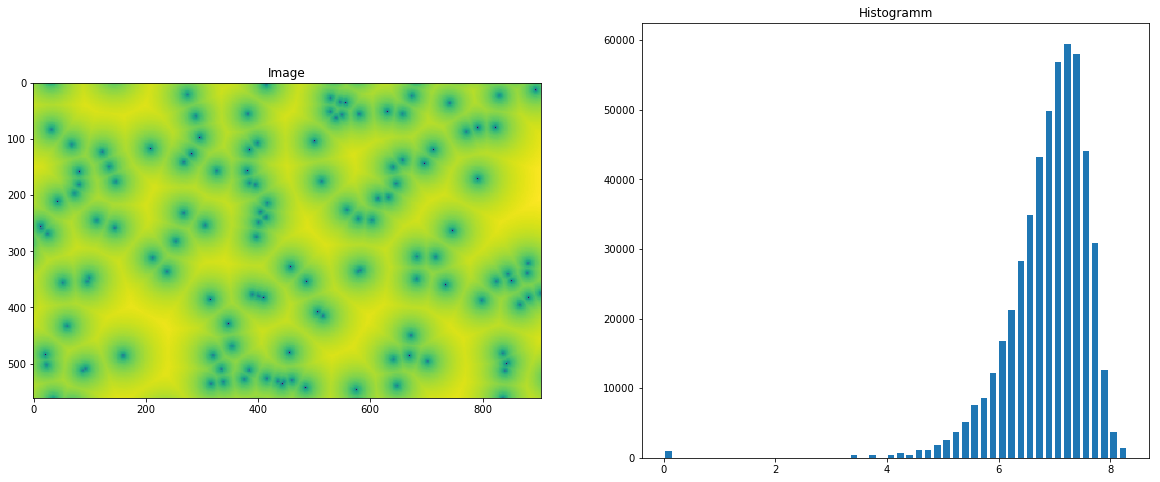

TIF_r_EucDist_faults


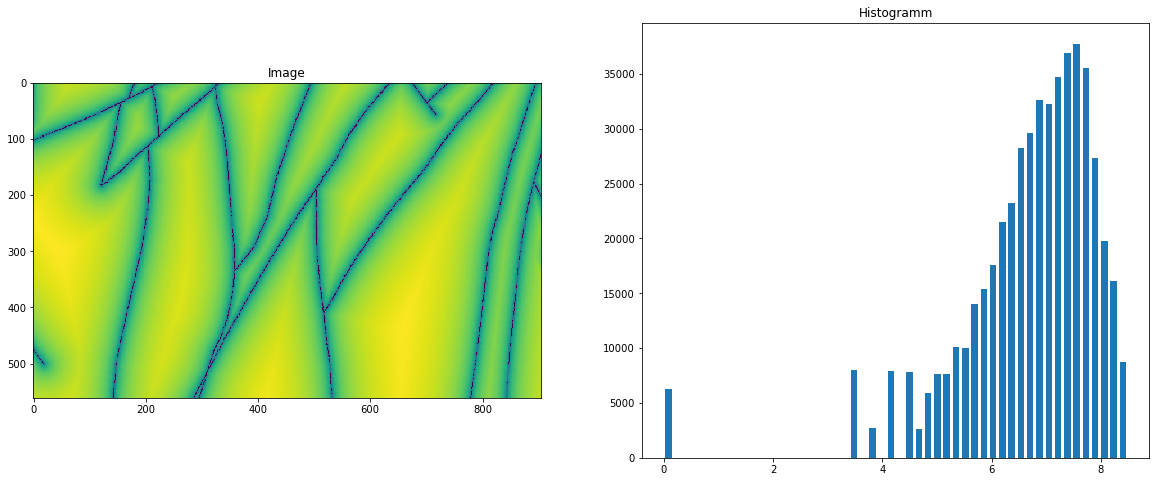

TIF_r_EucDist_roads


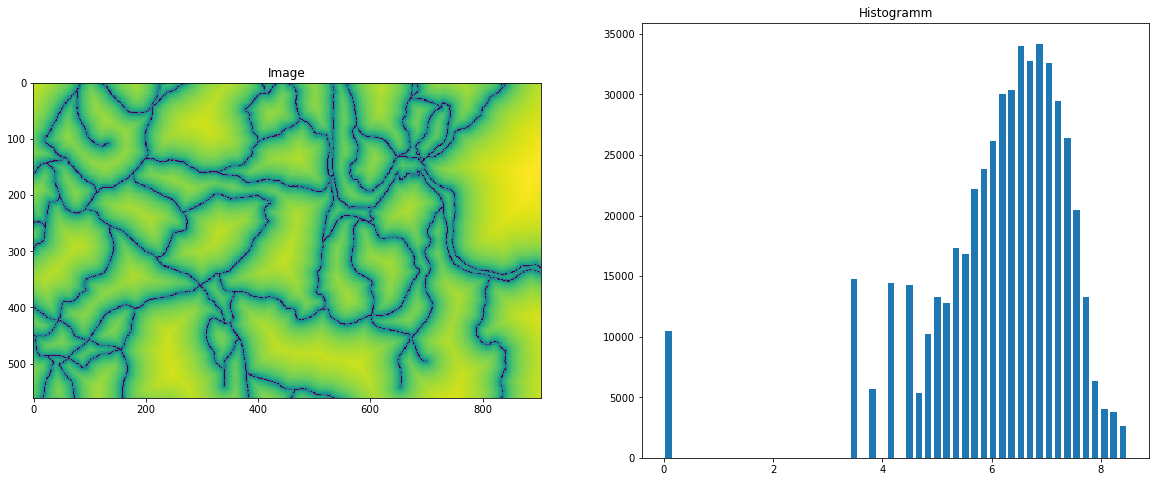

TIF_r_NDVI


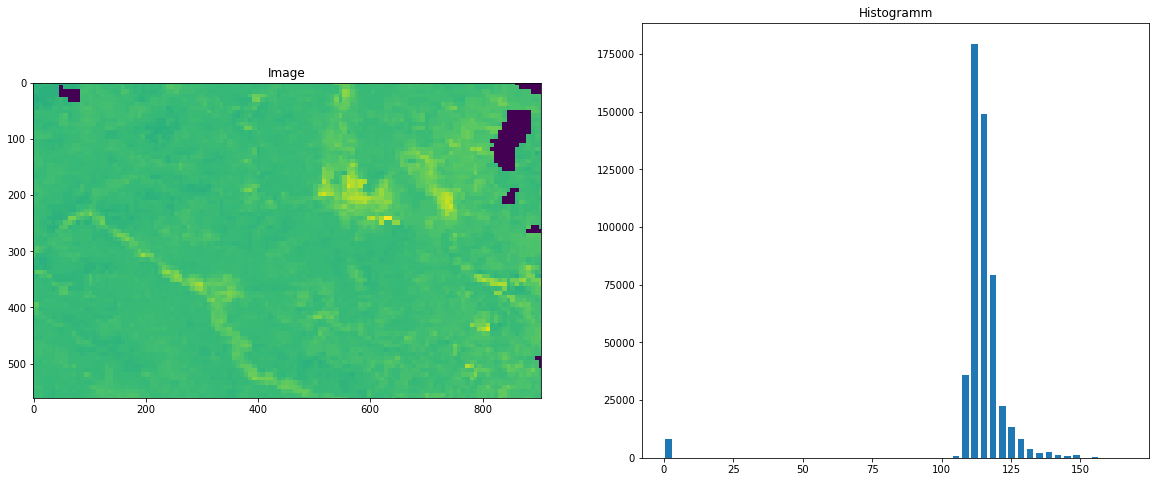

TIF_r_Slope


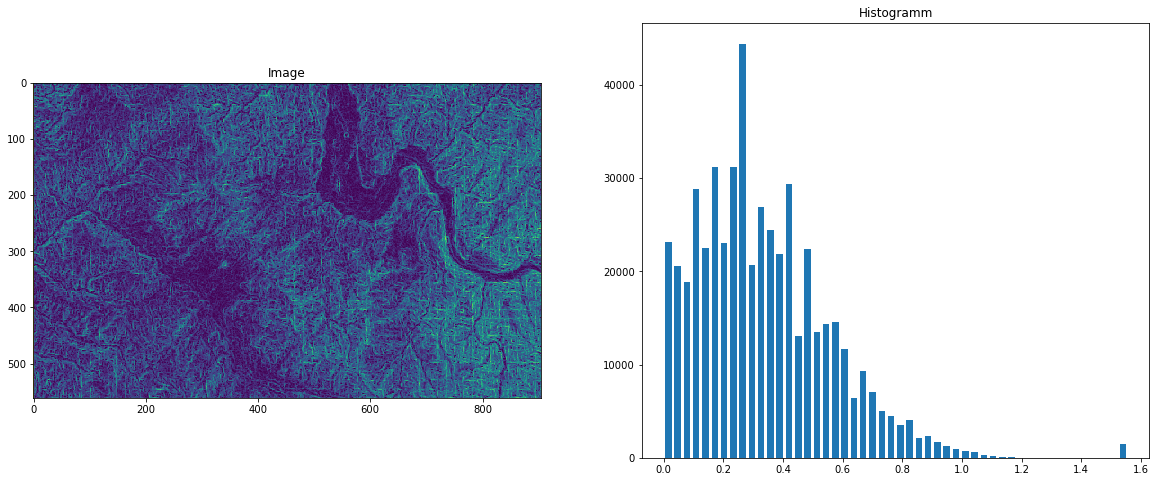

TIF_r_precip


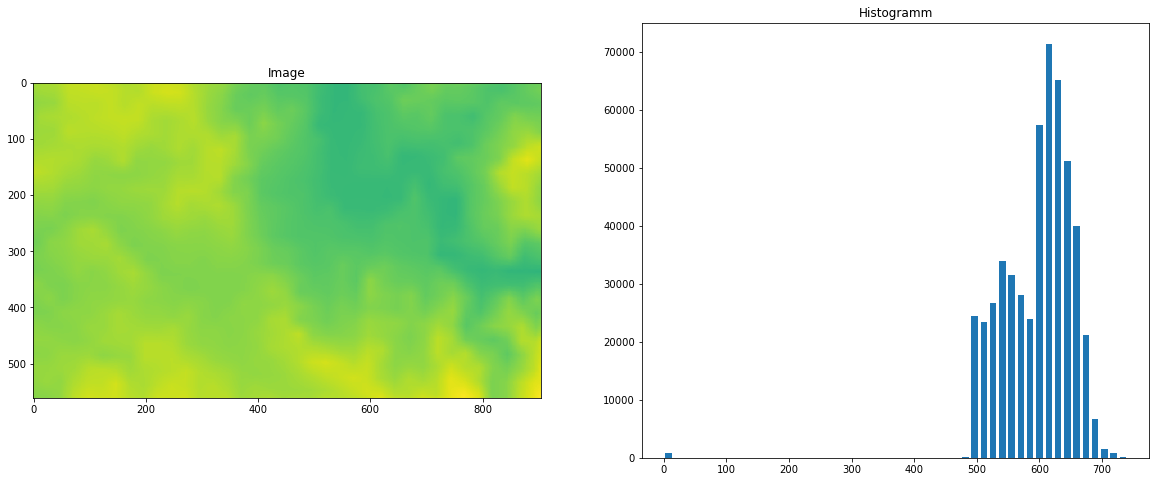

In [10]:
from scripts.BasisFunctions import showImage
    
for layer in sorted(LayerTrain):
    print( layer)
    showImage(LayerTrain.get(layer))
    #print Layers.get(layer)

Raster to Design-Matrix
===
- Reshape RasterMatrix to Vector and normalize it [0,1]
- make Design Matrix from column-Vectors




<img src="figures/data_representation.svg" width="75%">  

In [12]:
#reshape Matrix in Vektor umwandeln
from scripts.BasisFunctions import Mat2NormVec,Mat2Vec
import scipy.io as sio

ncols=len(LayerTrain)+1 
print( ncols)
A=np.zeros((np.ravel(LayerTrain.get('TIF_TrueLabels')).shape[0],ncols))  #Design Matrix Speicher initialisieren

A[:,0] = 1.0
i=1

for layer in sorted(LayerTrain):
    if 'TIF_r' in layer :
        A[:,i]=Mat2NormVec( LayerTrain.get(layer))
        print (i, layer, np.ravel(LayerTrain.get(layer)).shape)
    elif 'TIF_n' in layer :
        A[:,i]=Mat2Vec( LayerTrain.get(layer))
        print( i, layer, np.ravel(LayerTrain.get(layer)).shape)
    
    else: 
        i-=1
        print(i, layer, np.ravel(LayerTrain.get(layer)).shape)
    i+=1
A[:,ncols-1]=Mat2Vec(LayerTrain.get('TIF_TrueLabels'))


print( A)

# Check stats of disign matrix
print('Maximum Value in DesignMatrix: {}'.format(np.max(A)))
print( '    Anzahl TrueLabels A == 0 : {}'.format( np.sum(A[:,31] ==0)))
print( '    Anzahl TrueLabels A >  0 : {}'.format( np.sum(A[:,31] > 0)))
print( '                        Summe: {}'.format(np.sum(A[:,31] > 0)+np.sum(A[:,31] ==0)))

print( '  Anz. d. Pixel in ori Image : {}'.format(np.ravel(LayerTrain.get('TIF_TrueLabels')).shape[0]))


# Activate the following lines to write the prcessed data from RAM memory to disk 
# use it only locally and do not upload the git archive with the written files as they exite the max file size of a git repository

#sio.savemat('data/LayersTrain.mat', LayerTrain)
#sio.savemat('data/Matrix_A_Train.mat',{'A_Train': A})



32
0 TIF_TrueLabels (508048,)
1 TIF_n_ASPE (508048,)
2 TIF_n_ASPN (508048,)
3 TIF_n_ASPS (508048,)
4 TIF_n_ASPW (508048,)
5 TIF_n_LanduseIRA (508048,)
6 TIF_n_LanduseRAL (508048,)
7 TIF_n_LanduseRL (508048,)
8 TIF_n_PLUT (508048,)
9 TIF_n_SEDI (508048,)
10 TIF_n_VOLC (508048,)
11 TIF_r_AFG_GDEM_V21 (508048,)
12 TIF_r_B1 (508048,)
13 TIF_r_B10 (508048,)
14 TIF_r_B11 (508048,)
15 TIF_r_B2 (508048,)
16 TIF_r_B3 (508048,)
17 TIF_r_B4 (508048,)
18 TIF_r_B5 (508048,)
19 TIF_r_B6 (508048,)
20 TIF_r_B7 (508048,)
21 TIF_r_B8 (508048,)
22 TIF_r_B9 (508048,)
23 TIF_r_Curvature (508048,)
24 TIF_r_DistStreams (508048,)
25 TIF_r_EucDist_badakhshan (508048,)
26 TIF_r_EucDist_faults (508048,)
27 TIF_r_EucDist_roads (508048,)
28 TIF_r_NDVI (508048,)
29 TIF_r_Slope (508048,)
30 TIF_r_precip (508048,)
[[ 1.          0.          1.         ...,  0.          0.          0.        ]
 [ 1.          0.          1.         ...,  0.          0.          0.        ]
 [ 1.          0.          1.         ...,  0.

The prepared data structure (design matrix: A) has 31 features (cols) representing the chracteristics of a classification problem based on geographic data with 508048 datapoints (rows) or pixels from rasterdatasets. The last column (no. 32) is assigned to the decision result [0,1] (true labels) representing the absence or presence of an event.  